![DSA log](dsalogo.png)

1. Make sure you are using a version of notebook greater than v.3. If you installed Anaconda with python 3 - this is likely to be fine. The next piece of code will check if you have the right version.
2. The notebook has both some open test cases that you can use to test the functionality of your code - however it will be run on another set of test cases that you can't from which marks will be awarded. So passing all the tests in this notebook is not a guarantee that you have done things correctly - though its highly probable.
3. Also make sure you submit a notebook that doesn't return any errors. One way to ensure this is to run all the cells before you submit the notebook.
4. When you are done create a zip file of your notebook and upload that
5. For each cell where you see "YOUR CODE HERE" delete the return notImplemented statement when you write your code there - don't leave it in the notebook.
6. Once you are done, you are done.

Submit your answers (as a notebook) to the link provided for registration. In case of any questions, contact the organizers at `dsakampala2020@gmail.com`

In [1]:
import csv
import json
import pickle

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

%matplotlib inline

from numpy.testing import assert_equal, assert_almost_equal

## Problem 1
Write a function that computes the following transformation

$$ x = \cos(\phi) \times \cos(\theta) \times \rho $$

$$ y = \cos(\phi) \times \sin(\theta) \times \rho $$
$$ z = \sin(\phi) \times \rho $$

The function gets as input three numbers ($\phi, \theta, \rho$) and returns three numbers ($x, y, z$).

Test your function with various inputs such as:
- $0, 0, 0$
- $\pi, \pi, 0.5$

In [2]:
def transform_coordinates(phi, theta, rho):
# Initialized to some random values
    x, y, z = -1, -1, -1  
    x = np.cos(phi) * np.cos(theta) * rho
    y = np.cos(phi) * np.sin(theta) * rho
    z = np.sin(phi) * rho
    return x, y, z

In [3]:
# Basic tests
xx, yy, zz = transform_coordinates(0, 0, 0)
print(xx, yy, zz)

### BEGIN HIDDEN_TESTS
assert_equal(transform_coordinates(0, 0, 0), np.array((0, 0, 0)))
assert_almost_equal(
    transform_coordinates(np.pi, np.pi, 0.5), 
    np.array((0.5, -6.123233995736766e-17, 6.123233995736766e-17))
)
### END HIDDEN_TESTS

0.0 0.0 0.0


## Problem 2
We are interested in analysing the age of participants at some event. Lets generate some fake data about age withi some group and then see what insights we can gather from it.
We use `numpy` ability to generate random numbers to generate 50 random ages between 18 and 40. 

For this task we just want to generate the ages and store them in a variable called `participant_ages`

**NOTE** 
The random number generator supports seeding (see [1](https://en.wikipedia.org/wiki/Random_seed) and [2](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.seed.html) for detailed exposition)
For this task and and going forward remember to use the same seed for random number generation.

In [4]:
def generate_ages(min_age=18, max_age=40, sample_size=50):
    """ Generate random agents between given bounds"""
    # Set the seed for repeatability
    np.random.seed(42)
    
    # Initialize container for the ages
    pa = []
    # YOUR CODE HERE
    pa.extend(np.random.randint(min_age,max_age,sample_size))
    
    return pa

In [5]:
participant_ages = generate_ages(18, 40, 50)
print("Sampled ages are: {}".format(participant_ages))

### BEGIN HIDDEN_TESTS
assert len(participant_ages) == 50
assert min(participant_ages) >= 18
assert max(participant_ages) <= 40
### END HIDDEN_TESTS

Sampled ages are: [24, 37, 32, 28, 25, 38, 24, 36, 28, 28, 38, 21, 25, 20, 39, 38, 19, 29, 23, 19, 38, 18, 29, 39, 29, 34, 27, 33, 32, 32, 36, 29, 37, 20, 22, 36, 24, 38, 26, 24, 35, 21, 31, 35, 26, 38, 19, 37, 32, 24]


## Problem 3
Lets visualize the data we have just generated to get a better picture on what is going on.

We will used `matplotlib` library. The manual is available at [https://matplotlib.org](https://matplotlib.org)

Play with various kinds of visualizations to get a handle on how the library works. A bar plot works great for this kind of data. Labels your axes and title the plot

Text(0.5, 1.0, 'Participants age distribution')

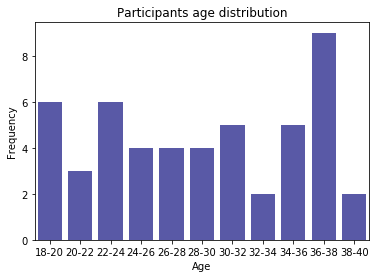

In [6]:
# YOUR CODE HERE
import seaborn as sns
df = pd.DataFrame(participant_ages,columns=['age'])
bins = np.arange(18,int(df['age'].max())+2,2)
labels = [f'{i}-{j}' for i,j in zip(bins[:-1],bins[1:])]
df['age_groups'] = pd.cut(df.age, 
                            bins=bins, 
                            labels=labels, 
                            right=True, 
                            include_lowest=True)


sns.countplot(df['age_groups'],color='blue', saturation=0.3)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Participants age distribution')


## Problem 4
We are now ready to do some basic analysis on the ages data we just generated from problem 2 above.

Lets start with the basics. Lets compute the following
- minimum 
- maximum 
- average 
- percentiles (70th, 80th, 90th) 
- variance
- standard deviation

Implement these in the following 3 functions

In [7]:
def min_max(ages):
    """ Computes the minimum and maximum element of the input"""
    min_ = 0
    max_ = 0
    # YOUR CODE HERE
    ages.sort()
    min_ = ages[0]
    max_ = ages[-1]
    return min_, max_

In [8]:
mm = min_max(participant_ages)
print(mm)

### BEGIN HIDDEN_TESTS
assert mm[0] == 18
assert mm[1] == 39
### END HIDDEN_TESTS

(18, 39)


In [9]:
def avr_var_dev(ages):
    """Computes the average, variance and standard deviation of the input"""
    # Initialize to random values
    a, v, d = 0, 0, 0
    # YOUR CODE HERE
    array_ages = np.array(ages)
    
    #Average
    a = np.mean(array_ages)
    
    #Variance
    v = np.var(array_ages)
    
    #Standard deviation     
    d = np.std(array_ages)
    
    return a, v, d

In [10]:
avd = avr_var_dev(participant_ages)
print(avd)

### BEGIN HIDDEN_TESTS
assert_equal(avd[0], 29.44)
assert_equal(avd[1], 42.926400000000015)
assert_equal(avd[2], 6.551824173464976)
### END HIDDEN_TESTS

(29.44, 42.926399999999994, 6.551824173464975)


AssertionError: 
Items are not equal:
 ACTUAL: 42.926399999999994
 DESIRED: 42.926400000000015

In [11]:
def percentiles(ages):
    """Computes the percentiles (70th, 80th, 90th)"""
    # Initialize to random values
    p70, p80, p90 = 0, 0, 0
    # YOUR CODE HERE
    ages_array = np.array(ages)
    
    #p70
    p70 = np.percentile(ages_array,70)
    
    #p80
    p80 = np.percentile(ages_array,80)
    
    #p90
    p90 = np.percentile(ages_array,90)
    
    return p70, p80, p90

In [12]:
p70, p80, p90 = percentiles(participant_ages)
print("Percentiles are: {}, {}, {}".format(p70, p80, p90))
### BEGIN HIDDEN_TESTS
assert_equal(p70, 35.0)
assert_equal(p80, 37.0)
assert_equal(p90, 38.0)
### END HIDDEN_TESTS

Percentiles are: 35.0, 37.0, 38.0


## Problem 5

In this part, we will load a dataset provided with this exercise, prepare it by converting to the right types and finally plot it to explore the data.

The dataset is stored in a CSV file with the following columns; [feature_1,feature_2,label] The values in each line are separated by a comma (',').

We want to:
- Load the data
- Clean it a little by performing some clipping

Implement these steps in the following functions

In [13]:
DATASET_NAME = 'dataset_original.csv'

In [14]:
def load_data(filename):
    """ Load dataset from a CSV file.
    
    Parameters
    -----------
    filename : str
        The filename of the CSV.
    
    Returns
    --------
    data : array-like
        Numpy array of the loaded data.
        
    Note
    -----
    Hints
    1) Pay attention to the header (column names) when creating the array.
    2) Pay attention to types read in (strings vs floats)
    
    """
    # YOUR CODE HERE
    with open(filename,'r') as file:
        reader = csv.reader(file)
        header = next(reader)
            
        data = np.array(list(reader)).astype(float)

    return data
       
               

In [15]:
data = load_data(DATASET_NAME)
print(data)

# Check your implementation against these basic tests
assert len(data) == 1000
assert data.shape == (1000, 3)

### BEGIN HIDDEN_TESTS
assert np.unique(data[:, 2]).tolist() == [0, 1]
### END HIDDEN_TESTS

[[ 1.14786796  0.9377818   1.        ]
 [ 0.17318939 -0.26448292  0.        ]
 [ 0.68044704  0.04814656  1.        ]
 ...
 [-0.4784924   1.27098628  1.        ]
 [ 2.15809386  1.63097509  1.        ]
 [ 0.99990501  1.6876248   1.        ]]


Now lets clean the dataset. We make the assumption that there is some noise in the data define by the following rules:

- Feature 1 should have values in the range  (−2,2]
- Feature 2 should only have positive values in the range  [0.0,1.5)
 
In practise, such rules are derived from domain knowledge from the area of interest. We will now filter the data and remove the 'noisy' samples (any sample which does not fall within ranges specified above). We also save the resulting dataset for future use.

In [16]:
from numpy import savetxt
def clean_data(data):
    """ Filter dataset by removing samples which do not match the rules 
    
    Parameters
    -----------
    data : array-like
        Dataset
    Returns
    -------
    new_data : array-like
        New dataset
    """
    # YOUR CODE HERE
    # clean feaature1
    feature1_clean = np.where((data[:,0]<=2) & (data[:,0]>-2))
    data1 = data[feature1_clean] 
    
    # clean feature2
    feature2_clean = np.where((data1[:,1]<1.5) & (data1[:,1]>=0.0))
    new_data = data1[feature2_clean]
    
    # save the newdataset as a csv file
    savetxt('cleaned_data.csv', new_data,fmt=['%10.11f','%10.12f','%d'], delimiter=',', header='feature_1, feature_2, label',comments='')
    
    return(new_data)

In [17]:
# Run the cleanup step
new_data = clean_data(data)

# Test your implementation against the following.
assert new_data.shape[0] == 329
### BEGIN HIDDEN_TESTS
assert (new_data[:, 0] > 2).all() == False
assert (new_data[:, 0] < -2).all() == False
assert (new_data[:, 1] < 0.0).all() == False
assert (new_data[:, 1] > 1.5).all() == False
### END HIDDEN_TESTS